In [1]:
import tensorflow as tf

2023-03-06 05:43:26.097368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 05:43:27.155980: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## 下載數據(0050近10年股價)

In [2]:
import yfinance as yf
df = yf.Ticker('0050.TW').history(period='10y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2013-03-06 00:00:00+08:00,55.700001,55.750000,55.200001,55.450001,4640574,0.0,0.0,0.0
2013-03-07 00:00:00+08:00,55.200001,55.650002,55.200001,55.400002,5956438,0.0,0.0,0.0
2013-03-08 00:00:00+08:00,55.599998,55.900002,55.599998,55.799999,12380659,0.0,0.0,0.0
2013-03-11 00:00:00+08:00,55.799999,56.099998,55.599998,55.900002,12066208,0.0,0.0,0.0
2013-03-12 00:00:00+08:00,55.900002,56.000000,55.549999,55.549999,7442935,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-02-24 00:00:00+08:00,119.900002,120.099998,118.800003,118.800003,5497731,0.0,0.0,0.0
2023-03-01 00:00:00+08:00,117.300003,119.449997,116.849998,119.349998,7467318,0.0,0.0,0.0
2023-03-02 00:00:00+08:00,119.349998,119.349998,118.300003,119.250000,3481231,0.0,0.0,0.0


In [3]:
df = df.filter(['Close'])
df

,Close
Date,
2013-03-06 00:00:00+08:00,55.450001
2013-03-07 00:00:00+08:00,55.400002
2013-03-08 00:00:00+08:00,55.799999
2013-03-11 00:00:00+08:00,55.900002
2013-03-12 00:00:00+08:00,55.549999
...,...
2023-02-24 00:00:00+08:00,118.800003
2023-03-01 00:00:00+08:00,119.349998
2023-03-02 00:00:00+08:00,119.250000


In [4]:
#檢查是否有空值
df['Close'].isnull().any()

False

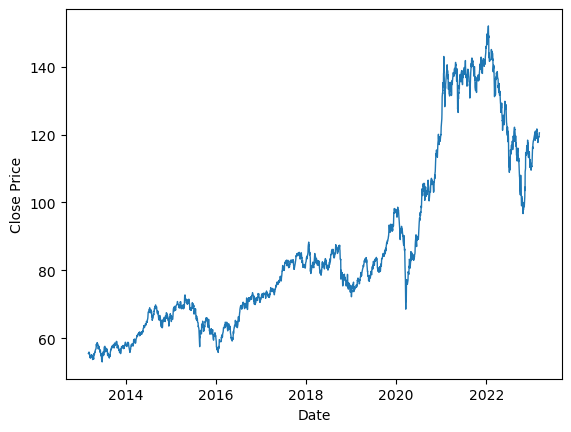

In [5]:
#收盤價可視化觀察
import matplotlib.pyplot as plt

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'], linewidth=1)
plt.show()

## 標準化數據

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_price = scaler.fit_transform(df.values)
scaler_price

array([[-1.17997914],
       [-1.18190435],
       [-1.16650249],
       ...,
       [ 1.27663076],
       [ 1.28048119],
       [ 1.32476183]])

## 數據結構化

In [7]:
import numpy as np

#以第一天至第60天收盤價做X,第61天收盤價做y,做第一筆數據,一直重複至最後一天
moving_size = 60

x, y = [], []
for i in range(len(scaler_price)-moving_size):
    x_day = scaler_price[i:i+moving_size]
    y_day = scaler_price[i+moving_size]
    x.append(x_day)
    y.append(y_day)

x = np.array(x)
y = np.array(y)

In [8]:
x.shape

(2388, 60, 1)

In [9]:
y.shape

(2388, 1)

## 切分資料

In [10]:
split_point = 0.8

train_size = round(x.shape[0] * split_point)
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

In [11]:
x_train.shape

(1910, 60, 1)

In [12]:
x_test.shape

(478, 60, 1)

## 構建模型

In [13]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Sequential

In [14]:
modle = Sequential()
modle.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
modle.add(LSTM(units=60, return_sequences=False))
modle.add(Dense(units=25))
modle.add(Dense(units=1))

modle.summary()

2023-03-06 05:43:54.487020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 lstm_1 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 25)                1525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 45,471
Trainable params: 45,471
Non-trainable params: 0
_________________________________________________________________


In [15]:
modle.compile(optimizer='adam', loss='mean_squared_error')

## 訓練模型

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

'''
train_data中再切分20%做validation_data,
train_data與validation_data的loss值之差20次訓練內不再降低,
則提早停止
'''

callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
modle.fit(x_train, y_train,
          validation_split=0.2,
          callbacks=[callback],
          epochs=1000)

Epoch 1/1000
48/48 [==============================] - 20s 184ms/step - loss: 0.0259 - val_loss: 0.0959
Epoch 2/1000
48/48 [==============================] - 7s 137ms/step - loss: 0.0031 - val_loss: 0.0967
Epoch 3/1000
48/48 [==============================] - 7s 137ms/step - loss: 0.0027 - val_loss: 0.1054
Epoch 4/1000
48/48 [==============================] - 7s 136ms/step - loss: 0.0027 - val_loss: 0.1077
Epoch 5/1000
48/48 [==============================] - 7s 137ms/step - loss: 0.0026 - val_loss: 0.0976
Epoch 6/1000
48/48 [==============================] - 7s 138ms/step - loss: 0.0024 - val_loss: 0.0955
Epoch 7/1000
48/48 [==============================] - 7s 139ms/step - loss: 0.0022 - val_loss: 0.0950
Epoch 8/1000
48/48 [==============================] - 7s 137ms/step - loss: 0.0021 - val_loss: 0.0820
Epoch 9/1000
48/48 [==============================] - 7s 137ms/step - loss: 0.0020 - val_loss: 0.0738
Epoch 10/1000
48/48 [==============================] - 7s 138ms/step - loss: 0.00

## 測試模型

In [17]:
preds = modle.predict(x_test)
preds

15/15 [==============================] - 3s 53ms/step


array([[1.4109268 ],
       [1.4136727 ],
       [1.4118707 ],
       [1.4088438 ],
       [1.4015802 ],
       [1.3914226 ],
       [1.3864484 ],
       [1.3901101 ],
       [1.4001576 ],
       [1.4103969 ],
       [1.420075  ],
       [1.4332355 ],
       [1.449686  ],
       [1.4656527 ],
       [1.477293  ],
       [1.4840983 ],
       [1.4886626 ],
       [1.4942629 ],
       [1.5011674 ],
       [1.5084199 ],
       [1.5145156 ],
       [1.5165333 ],
       [1.5144069 ],
       [1.512213  ],
       [1.5151488 ],
       [1.5226349 ],
       [1.5301663 ],
       [1.5360466 ],
       [1.5361954 ],
       [1.5286127 ],
       [1.5137813 ],
       [1.4975263 ],
       [1.4882452 ],
       [1.4849439 ],
       [1.4747221 ],
       [1.4484525 ],
       [1.4075625 ],
       [1.364348  ],
       [1.3220189 ],
       [1.2960389 ],
       [1.2879877 ],
       [1.2882196 ],
       [1.2961245 ],
       [1.3092759 ],
       [1.3286391 ],
       [1.3517481 ],
       [1.372164  ],
       [1.392

In [18]:
preds = scaler.inverse_transform(preds)
preds

array([[122.73777 ],
       [122.80908 ],
       [122.76228 ],
       [122.68367 ],
       [122.49503 ],
       [122.23123 ],
       [122.10204 ],
       [122.19714 ],
       [122.458084],
       [122.72401 ],
       [122.97536 ],
       [123.31714 ],
       [123.74438 ],
       [124.15904 ],
       [124.46135 ],
       [124.638084],
       [124.75662 ],
       [124.90207 ],
       [125.08138 ],
       [125.26974 ],
       [125.42805 ],
       [125.480446],
       [125.425224],
       [125.36825 ],
       [125.44449 ],
       [125.63891 ],
       [125.8345  ],
       [125.98722 ],
       [125.99109 ],
       [125.79416 ],
       [125.40897 ],
       [124.986824],
       [124.74579 ],
       [124.66005 ],
       [124.394585],
       [123.71234 ],
       [122.6504  ],
       [121.52808 ],
       [120.428764],
       [119.75404 ],
       [119.544945],
       [119.55097 ],
       [119.75626 ],
       [120.09782 ],
       [120.60069 ],
       [121.20085 ],
       [121.73107 ],
       [122.2

## 模型評估

/tmp/ipykernel_192/4154705731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predict'] = preds


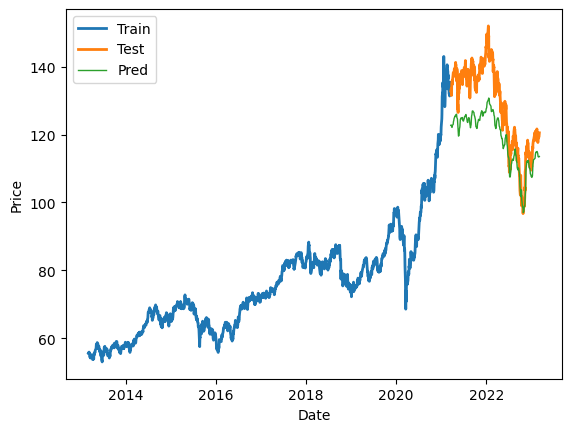

In [28]:
train_df = df[:train_size+moving_size]
test_df = df[train_size+moving_size:]
test_df['predict'] = preds

plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train_df['Close'], linewidth=2)
plt.plot(test_df['Close'], linewidth=2)
plt.plot(test_df['predict'], linewidth=1)
plt.legend(['Train', 'Test', 'Pred'])
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predict_mse = mean_squared_error(test_df['Close'], test_df['predict'])
print(predict_mse)

predict_r2 = r2_score(test_df['Close'], test_df['predict'])
print(predict_r2)

117.85103798218748
0.2874031273344727
